In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
#from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline
from matplotlib import pyplot as plt

#import torch
#import random

#!wget https://drive.google.com/drive/folders/13461-R08muyYnBQTq14z-OG8Tmy9o-5R?usp=share_link
#df = pd.read_csv('housing.csv')

#data_url = "http://lib.stat.cmu.edu/datasets/boston"
#raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None, names=name)
#features = torch.tensor(np.hstack([df.values[::2, :], df.values[1::2, :2]]))
#labels = torch.tensor(df.values[1::2, 2])
#print(df)
#from google.colab import drive
#drive.mount('/content/drive')
#path = '/content/gdrive/My Drive/Tmp/' # the absolute path to your file
#df = pd.read_csv(path + 'housing.csv')
#drive.flush_and_unmount()
#files.upload()
#df = pd.read_csv("C:/Tmp/housing.csv", sep=" ")
#df

In [2]:
# Boston House Price dataset has 14 features and their description is given as follows:
# CRIM per capita crime rate by town
# ZN proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS proportion of non-retail business acres per town
# CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX nitric oxides concentration (parts per 10 million)
# RM average number of rooms per dwelling
# AGE proportion of owner-occupied units built prior to 1940
# DIS weighted distances to five Boston employment centres
# RAD index of accessibility to radial highways
# TAX full-value property-tax rate per dollar 10,000.
# PTRATIO pupil-teacher ratio by town
# B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT % lower status of the population
# MEDV Median value of owner-occupied homes in $1000's
name= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# чтение данных из файла
df = pd.read_csv(filepath_or_buffer="housing.csv", dtype=np.float32, delim_whitespace=True,names=name)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136780,0.069170,0.554695,6.284634,68.574898,3.795043,9.549407,408.237152,18.455534,356.674042,12.653064,22.532806
std,8.601545,23.322390,6.860355,0.253993,0.115878,0.702617,28.148869,2.105711,8.707269,168.537170,2.164946,91.294838,7.141063,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [5]:
# разделение на признаки и метки
features = torch.tensor(df.values[0::, 0:13])
labels = torch.tensor(df.values[0::, 13])
#print(features)
#print(labels)

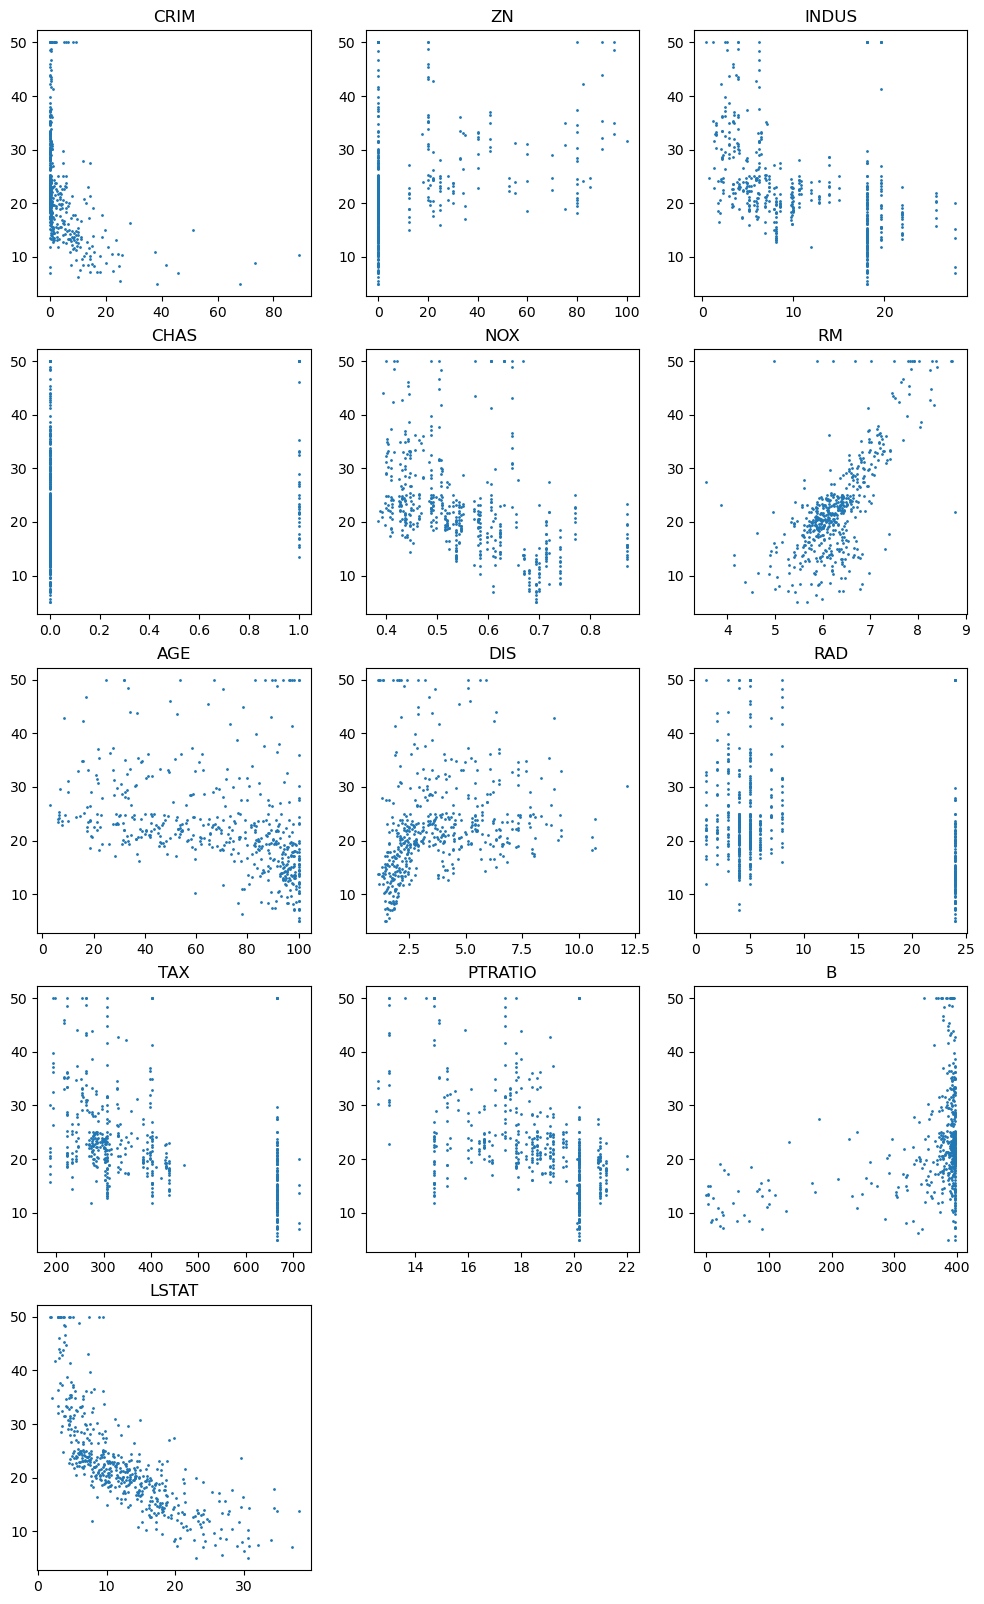

In [6]:
# CRIM per capita crime rate by town
# ZN proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS proportion of non-retail business acres per town
# CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX nitric oxides concentration (parts per 10 million)
# RM average number of rooms per dwelling
# AGE proportion of owner-occupied units built prior to 1940
# DIS weighted distances to five Boston employment centres
# RAD index of accessibility to radial highways
# TAX full-value property-tax rate per dollar 10,000.
# PTRATIO pupil-teacher ratio by town
# B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT % lower status of the population
# MEDV Median value of owner-occupied homes in $1000's
plt.figure(figsize=(12, 20))

plt.subplot(5,3,1)
plt.title('CRIM')
#g1.set_xlabel('CRIM')
plt.scatter(features[:, 0], labels, 1)

plt.subplot(5,3,2)
plt.title('ZN')
plt.scatter(features[:, 1], labels, 1)

plt.subplot(5,3,3)
plt.title('INDUS')
plt.scatter(features[:, 2], labels, 1)

plt.subplot(5,3,4)
plt.title('CHAS')
plt.scatter(features[:, 3], labels, 1)

plt.subplot(5,3,5)
plt.title('NOX')
plt.scatter(features[:, 4], labels, 1)

plt.subplot(5,3,6)
plt.title('RM')
plt.scatter(features[:, 5], labels, 1)

plt.subplot(5,3,7)
plt.title('AGE')
plt.scatter(features[:, 6], labels, 1)

plt.subplot(5,3,8)
plt.title('DIS')
plt.scatter(features[:, 7], labels, 1)

plt.subplot(5,3,9)
plt.title('RAD')
plt.scatter(features[:, 8], labels, 1)

plt.subplot(5,3,10)
plt.title('TAX')
plt.scatter(features[:, 9], labels, 1)

plt.subplot(5,3,11)
plt.title('PTRATIO')
plt.scatter(features[:, 10], labels, 1)

plt.subplot(5,3,12)
plt.title('B')
plt.scatter(features[:, 11], labels, 1)

plt.subplot(5,3,13)
plt.title('LSTAT')
plt.scatter(features[:, 12], labels, 1)
plt.show()

In [7]:
# разделение на тренировочный и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42) 
print('Training Shape: ',x_train.shape)
print('Testing  Shape: ',x_test.shape)

Training Shape:  torch.Size([404, 13])
Testing  Shape:  torch.Size([102, 13])


In [8]:
# нормализация входных данных
x_train = torch.nn.functional.normalize(x_train)

In [9]:
batch_size = 5
 
dataset = TensorDataset(x_train, y_train)
# Выборочное чтение mini-batches
data_iter = DataLoader(dataset, batch_size, shuffle=False) #shuffle=True)

# Read a batch to see how it works
i=0
for X, y in data_iter:
    i+=1
    #print(i, X, y)
    break

In [10]:
model = torch.nn.Sequential(torch.nn.Linear(13, 1))

In [11]:
print(model[0].weight.data)

tensor([[ 0.0095, -0.0596,  0.1754,  0.2674,  0.1676,  0.2577, -0.2211, -0.1448,
          0.0951, -0.0422,  0.2136, -0.0380,  0.1756]])


In [12]:
model[0].weight.data = torch.rand(13).requires_grad_(True).reshape((1, 13))
model[0].bias.data = torch.rand(1).requires_grad_(True)
print(model[0].weight.data)
print(model[0].bias.data)

tensor([[0.4516, 0.0427, 0.1324, 0.8451, 0.9911, 0.3927, 0.9082, 0.7943, 0.6349,
         0.3607, 0.3111, 0.1030, 0.0650]])
tensor([0.4837])


In [13]:
loss = torch.nn.MSELoss(reduction='mean')

In [14]:
trainer = torch.optim.SGD(model.parameters(), lr=0.1)

In [15]:
for X, y in data_iter:
    #print(X, y) 
    break

In [16]:
num_epochs = 1000
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        trainer.zero_grad()
        l = loss(model(X).reshape(-1), y)
        l.backward()
        trainer.step()  
    l = loss(model(x_train).reshape(-1), y_train)
    if epoch % 100 == 0:
        print('epoch %d, loss: %f' % (epoch, l.item()))
        #print('epoch %d, loss: %f' % (epoch, l.item()),'|\tw', model[0].weight.data, '|\tb', model[0].bias.data)

epoch 100, loss: 56.820732
epoch 200, loss: 51.078812
epoch 300, loss: 46.818089
epoch 400, loss: 43.689186
epoch 500, loss: 41.384636
epoch 600, loss: 39.674969
epoch 700, loss: 38.394745
epoch 800, loss: 37.425388
epoch 900, loss: 36.681988
epoch 1000, loss: 36.103535


Проверка данных на тренировочном наборе

In [18]:
l = loss(model(x_train).reshape(-1), y_train)
print(l)

tensor(36.1035, grad_fn=<MseLossBackward0>)


Проверка данных на тестовом наборе

In [20]:
x_test = torch.nn.functional.normalize(x_test)
l = loss(model(x_test).reshape(-1), y_test)
print(l)

tensor(27.2349, grad_fn=<MseLossBackward0>)
